<a href="https://colab.research.google.com/github/marcusos/wsb_institutional_economics_paper/blob/main/wsb_article_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To-dos
- [x] Add the WSB data to drive
- [x] Load the WSB data
- [ ] Build post time series about the main WSB tickers
- [ ] Build the top poster since 2021
- [ ] Build tops posters by tickers

## Brainstorm
* Do a topic moeling, add 

## Installing dependencies

In [ ]:
# Python API reddit warapper
#!pip uninstall asyncpraw
#!pip install asyncpraw

## Setup

In [16]:
%reload_ext autoreload
%autoreload 1
%aimport functions

In [17]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from functions import *
from matplotlib import pyplot
#import praw
# https://www.reddit.com/prefs/apps


## Load data

In [41]:
# Kaggle data link: https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts
# https://www.kaggle.com/leukipp/reddit-finance-data
#df = pd.read_hdf('/content/drive/MyDrive/Colab Notebooks/mestrado/economia_instituicoes/data/reddit_wsb.csv', parse_dates = ['timestamp'], infer_datetime_format=True)
df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/mestrado/economia_instituicoes/data/submissions_reddit.csv', 
    parse_dates = ['created', 'retrieved', 'edited'], 
    infer_datetime_format=True
)

df['title'] = df.title.str.lower()
df['selftext'] = df.title.str.lower()
df['text'] = df.title + " " + df.selftext
df['text'] = df.title.astype(str)
df['created_date'] = df['created'].dt.floor('d')
add_stock_col(df)

stock_df = df[df.stock.isin(['amc', 'gme'])]

In [42]:
df.dtypes

id                               object
author                           object
created                  datetime64[ns]
retrieved                datetime64[ns]
edited                   datetime64[ns]
pinned                            int64
archived                          int64
locked                            int64
removed                           int64
deleted                           int64
is_self                           int64
is_video                          int64
is_original_content               int64
title                            object
link_flair_text                  object
upvote_ratio                    float64
score                             int64
gilded                            int64
total_awards_received             int64
num_comments                      int64
num_crossposts                    int64
selftext                         object
thumbnail                        object
shortlink                        object
text                             object


## Data pre-processing



## EDA

Dataset summary

In [43]:
print('WSB data summary')
print('Data size:', len(df))
print('Max data:', df.created.max())
print('Min data:', df.created.min())

WSB data summary
Data size: 497489
Max data: 2021-03-20 14:33:43
Min data: 2021-01-01 00:02:06


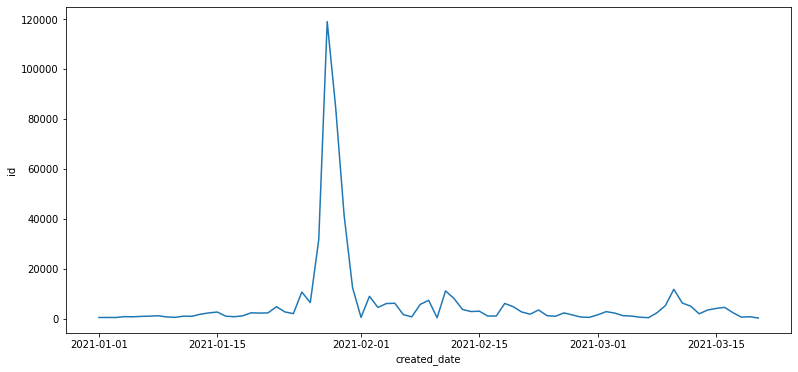

In [44]:
df_grouped = df.groupby(['created_date'])['id'].count().reset_index()

fig, ax = pyplot.subplots(figsize=(13,6))
sns.lineplot(x='created_date', y='id', data=df_grouped)

Plot GME and AMC timeseries

## Article Planning

## Glossary
Thinknum - plata: https://www.thinknum.com/datasets

## References
* Reddit data
  * https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts
* EDA and Sentiment Analysis of Reddit Data
  * https://towardsdatascience.com/exploring-reddit-wallstreetbets-posts-data-bed613386029
* Using BERT, HDBSCAN and PEGASUS to automate insight generation from text
  * https://towardsdatascience.com/using-the-wallstreetbets-subreddit-to-gain-insights-on-historic-stock-market-trends-9e20ced0bc1d
* Serving model:
  * https://towardsdatascience.com/deploying-ml-models-in-production-with-fastapi-and-celery-7063e539a5db
* News about WSB data:
  * https://edition.cnn.com/2021/02/03/investing/wall-street-reddit-hedge-funds/index.html
* Tickers EDA, and top tokens
  * https://www.kaggle.com/asheone/descriptive-analysis-most-used-words-and-tickers